In [1]:
import sunpy
import sunpy.map
import numpy as np
import matplotlib.pyplot as plt
import sunpy.visualization.colormaps
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.coordinates import SkyCoord

from matplotlib.patches import ConnectionPatch

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# Rebuild the matplotlib font cache
fm._rebuild()

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

plt.rcParams['text.usetex'] = True

In [3]:
# need to run IRIS_SJI_img prior to running this!!!!!
%store -r sji2
%store -r aia_dat2
%store -r x
%store -r y

In [4]:
pth = '/Users/WilliamHenryAshfieldIV/dat/'
my_map = sunpy.map.Map(pth+'AIA_1600.jp2')

In [5]:
cmap = plt.get_cmap('sdoaia171')

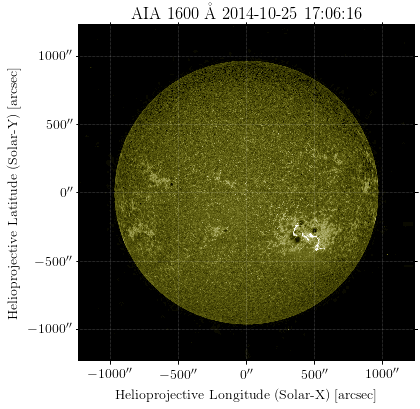

In [6]:
fig = plt.figure(figsize=(6, 15))
fig.add_subplot(111, projection=my_map)
my_map.plot(clip_interval=(1, 99.99)*u.percent)

In [7]:
print('xrange=',x[15],x[340])
print('yrange=',y[15],y[350])

xrange= 346.90905 455.03655
yrange= -373.80425 -262.34975


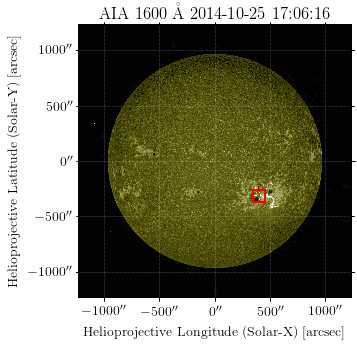

In [8]:
fig = plt.figure(figsize=(5, 5))
fig.add_subplot(111, projection=my_map)
my_map.plot(clip_interval=(1, 99.99)*u.percent)

# Specify two opposite corners of the rectangle as a single, two-element
# SkyCoord object
coords = SkyCoord(
    Tx=(346.90905,455.03655) * u.arcsec,
    Ty=(-262.34975,-373.80425) * u.arcsec,
    frame=my_map.coordinate_frame,
)
my_map.draw_rectangle(
    coords,
    edgecolor="red",
    linestyle="-",
    linewidth=2,
    label='2-element SkyCoord'
)

In [9]:
xlims_world = [250, 650]*u.arcsec #small
ylims_world = [-500, -150]*u.arcsec

In [10]:
world_coords = SkyCoord(Tx=xlims_world, Ty=ylims_world, frame=my_map.coordinate_frame)
pixel_coords = my_map.world_to_pixel(world_coords)

# we can then pull out the x and y values of these limits.
xlims_pixel = pixel_coords.x.value
ylims_pixel = pixel_coords.y.value

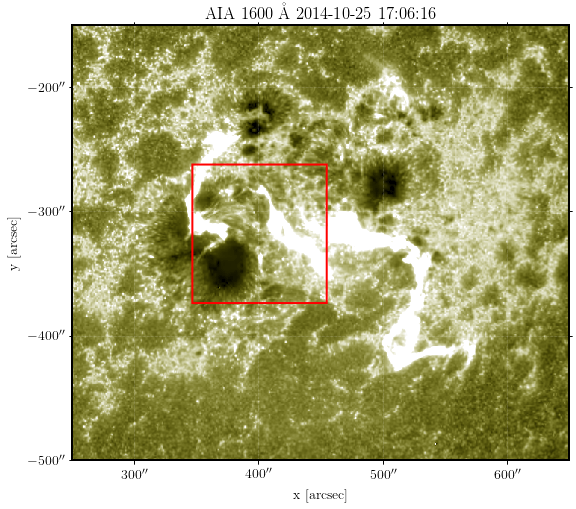

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=my_map)
my_map.plot(axes=ax, clip_interval=(1, 99.9)*u.percent)

ax.set_xlim(xlims_pixel)
ax.set_ylim(ylims_pixel)

ax.set_xlabel('x [arcsec]')
ax.set_ylabel('y [arcsec]')

coords = SkyCoord(
    Tx=(346.90905,455.03655) * u.arcsec,
    Ty=(-262.34975,-373.80425) * u.arcsec,
    frame=my_map.coordinate_frame,
)
my_map.draw_rectangle(
    coords,
    edgecolor="red",
    linestyle="-",
    linewidth=2,
    label='2-element SkyCoord'
)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


(-373.80425, -262.34975)

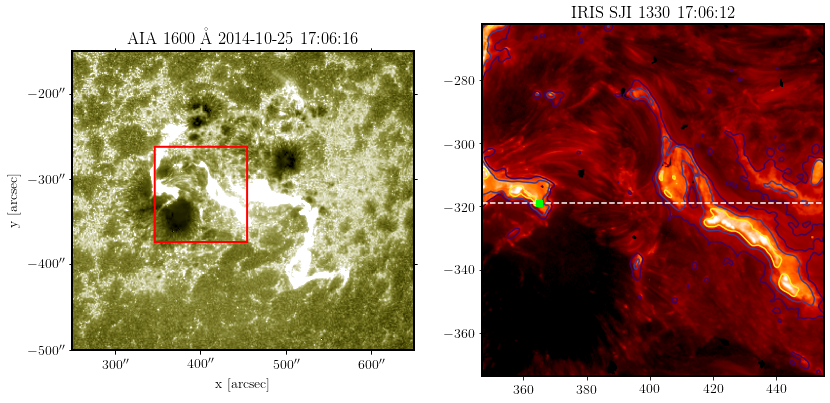

In [12]:
fig = plt.figure(figsize=(12, 6))
plt.subplots_adjust(bottom = 0.05, left = 0.1, top = 0.95, right = 0.97)

# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(1,2,1,projection=my_map) # two rows, two columns, fist cel
my_map.plot(axes=sub1, clip_interval=(1, 99.9)*u.percent)

sub1.set_xlim(xlims_pixel)
sub1.set_ylim(ylims_pixel)

sub1.set_xlabel('x [arcsec]')
sub1.set_ylabel('y [arcsec]')

sub1.coords.grid(False)

coords = SkyCoord(
    Tx=(346.90905,455.03655) * u.arcsec,
    Ty=(-262.34975,-373.80425) * u.arcsec,
    frame=my_map.coordinate_frame,
)
my_map.draw_rectangle(
    coords,
    edgecolor="red",
    linestyle="-",
    linewidth=2,
    label='2-element SkyCoord'
)

# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(1,2,2) # two rows, two columns, second cell

sub2.imshow(sji2,norm=LogNorm(),vmin=15,cmap='gist_heat',origin='lower',extent = (x[0],x[-1],y[0],y[-1]))
plt.axhline(y=y[180], color='white', linestyle='--',zorder=2)

aia2 = np.roll(aia_dat2,3,axis=0)
aia2 = np.roll(aia2,-2,axis=1)
sub2.contour(aia2,levels=[500,1100,4000],extent = (x[0],x[-1],y[0],y[-1]))

s=20*4**1.5
sub2.scatter(x[69], y[180],marker=',',color='lime',zorder=3)

sub2.set_title('IRIS SJI 1330 17:06:12')

sub2.set_xlim(x[15],x[340])
sub2.set_ylim(y[15],y[350])

In [13]:
#fig.savefig('delux_aia_iris.pdf', format='pdf', edgecolor='w',facecolor='w', dpi = 700)